### Finalno sredjivanje podataka i sprovodjenje linearne regresije 

In [118]:
# Importing the relevant libraries 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [120]:
# Loading the csv file
raw_data = pd.read_csv('real_estate_cleaned.csv')
raw_data.head()

Title    Location  Size  Price in EUR  Rooms
0  Dvoiposobni stan sa velikom tersom u kompleksu...    Voždovac    70        210000   2.00
1          Vojvode Stepe, sa parking mestom ID#10180    Voždovac    60        185000   3.00
2                        Galenika, 2.5 stan ID#10159    Galenika    62        150000   3.00
3                        Mirijevo, 2.5 stan ID#10151  Mirijevo I    57        125000   3.00
4                   Kompletno namešten stan ID#10102  Mirijevo I    54        138000   3.00

In [122]:
raw_data.describe(include='all')

Title  Location    Size  Price in EUR   Rooms
count                                         6948      6948 6948.00       6948.00 6948.00
unique                                        6797       236     NaN           NaN     NaN
top     Luksuzna novogradnja na Ledinama kod crkve  Voždovac     NaN           NaN     NaN
freq                                             6       341     NaN           NaN     NaN
mean                                           NaN       NaN   74.88     215933.46    2.94
std                                            NaN       NaN   27.21     102968.63    0.88
min                                            NaN       NaN    9.00      32000.00    1.00
25%                                            NaN       NaN   56.00     135000.00    2.00
50%                                            NaN       NaN   70.00     198000.00    3.00
75%                                            NaN       NaN   90.00     279900.00    3.00
max                                            NaN       NaN  163.00     535000.00    5.00

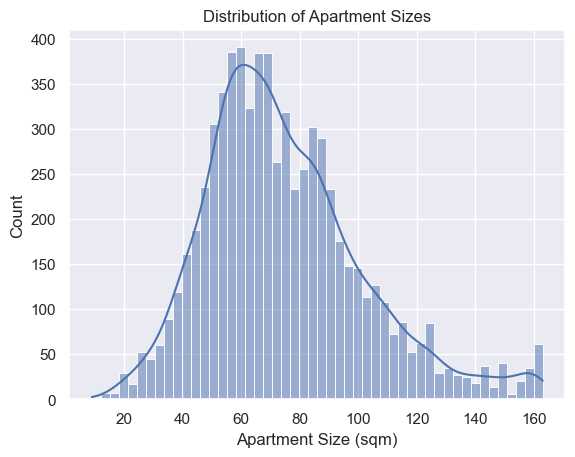

In [124]:
# Visualization of apartmant sizes
sns.histplot(raw_data['Size'], bins=50, kde=True)
plt.xlabel("Apartment Size (sqm)")
plt.ylabel("Count")
plt.title("Distribution of Apartment Sizes")
plt.show()

In [125]:
mali_stanovi = raw_data['Size'].quantile(0.15) 

In [128]:
mali_stanovi_ = raw_data[raw_data['Size'] < mali_stanovi]
raw_data = pd.concat([raw_data, mali_stanovi_])  # Duplicating the small apartments (since there are not a lot)

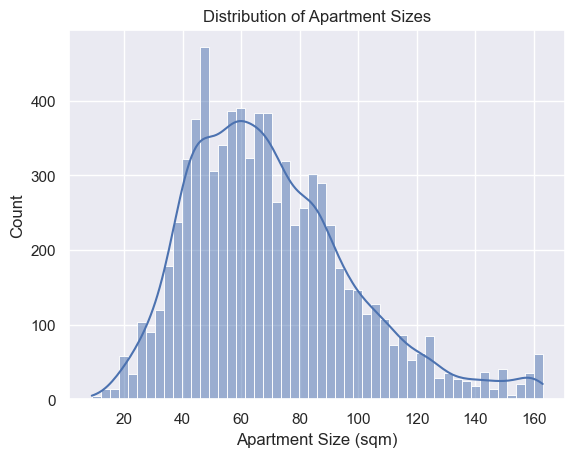

In [130]:
sns.histplot(raw_data['Size'], bins=50, kde=True)
plt.xlabel("Apartment Size (sqm)")
plt.ylabel("Count")
plt.title("Distribution of Apartment Sizes")
plt.show()

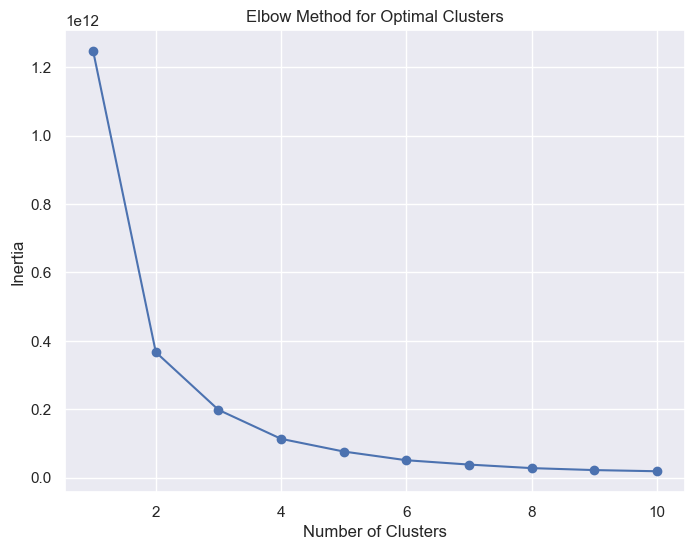

Title                                      Location  Size  Price in EUR  Rooms  log_price  Location_Cluster
0     Dvoiposobni stan sa velikom tersom u kompleksu...                                      Voždovac    70        210000   2.00      12.25                 2
1             Vojvode Stepe, sa parking mestom ID#10180                                      Voždovac    60        185000   3.00      12.13                 2
2                           Galenika, 2.5 stan ID#10159                                      Galenika    62        150000   3.00      11.92                 0
3                           Mirijevo, 2.5 stan ID#10151                                    Mirijevo I    57        125000   3.00      11.74                 0
4                      Kompletno namešten stan ID#10102                                    Mirijevo I    54        138000   3.00      11.84                 0
5         Terazije, Balkanska, mereno 56.7m2 ID#9904111                                  Centar (uži)    45        198000   3.00      12.20                 6
6              Bež.kosa III, bela fasadna cigla ID#9993                           Bežanijska kosa III    65        199500   3.00      12.20                 7
7            Terazije, Balkanska, mereno 56.7m2 ID#9904                           Terazije ( centar )    45        198000   3.00      12.20                 1
8               Centar, Dositejeva, mereno 57m2 ID#9821                                 Gornji Dorćol    49        237500   3.00      12.38                 6
9                    Olimp, Milana Rakića, 71m2 ID#9549                                         Olimp    71        220000   3.00      12.30                 7
10      Zvezdara, odličan 2.5 stan, novogradnja ID#9517                               Cvetkova pijaca    60        190000   3.00      12.15                 2
11               Blok 62, Jurija Gagarina, 68m2 ID#9488                          Novi Beograd Blok 62    68        162000   3.00      12.00                 7
12                    Odlična lokacija na Lionu ID#9462                                          Lion    57        188000   3.00      12.14                 6
13    Stan je na odličnoj lokaciji, mereno 76m2 ID#9158                             Dedinje (25. maj)    57        214200   3.00      12.27                 3
14                      Savski trg, mereno 80m2 ID#9095                                    Savski trg    57        185000   3.00      12.13                 7
15             Blok 28, 2s u zgradi televizorka ID#8942              Novi Beograd Blok 28 (Potkovica)    66        184000   3.00      12.12                 2
16         Mirijevo, Ljubiše Miodragovića, 56m2 ID#8853                                    Mirijevo I    56         82000   3.00      11.31                 0
17                    Stan na odličnoj lokaciji ID#8520                                 Gornji Dorćol    67        310000   3.00      12.64                 6
18          Izuzetan salonac u  starijoj zgradi ID#7824                                  Centar (uži)    76        226000   3.00      12.33                 6
19                Odlična lokacija, mereno 57m2 ID#7794                                Kalenić pijaca    53        189000   2.00      12.15                 1
20        Stepa Stepanović, Druge Srpske Armije ID#7725                                      Voždovac    86        228000   3.00      12.34                 2
21                Sumice,novogradnja 4,5  dupleks 124m2                                        Šumice   124        334800   4.00      12.72                 3
22            Sumice,novogradnja dupleks 5,0 stan 142m2                                        Šumice   142        383400   5.00      12.86                 3
23       Novi Beograd - Tošin bunar, 125m2, Tošin bunar                                   Tošin bunar   125        437675   4.00      12.99                 6
24    Stari grad, Skadarlija - Skadarska, 96m2, Skad...                                    Skadarlij

In [131]:
# Clustering locations so we avoid too many dummy variables based on location
from sklearn.cluster import KMeans

# Log-transform price for better scaling
raw_data['log_price'] = np.log(raw_data['Price in EUR'])

# Aggregate data by location (mean Size, Price, and Rooms per location)
location_features = raw_data.groupby('Location')[['Size', 'Price in EUR', 'Rooms']].mean()

# Determine optimal clusters using the Elbow method
inertia = []
for k in range(1, 11):  # Test between 1 and 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(location_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Choose the optimal number of clusters based on the elbow graph
optimal_k = 10  # Adjust based on the elbow point

# Apply KMeans clustering to locations
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
location_features['Location_Cluster'] = kmeans.fit_predict(location_features)

# Merge clusters back into the original data
raw_data = raw_data.merge(location_features[['Location_Cluster']], left_on='Location', right_index=True)

raw_data


In [133]:
# Saving a csv file containing the location and the cluster they belong to (will be used later in the prediction file)
location_cluster_mapping = pd.DataFrame({
    'location': raw_data['Location'],
    'cluster': raw_data['Location_Cluster'] 
})

# Drop duplicates to only have one row per location
location_cluster_mapping = location_cluster_mapping.drop_duplicates()

# Save to CSV
location_cluster_mapping.to_csv('location_cluster_mapping.csv', index=False)

In [134]:
# Displaying which location belong to which cluster
# Group locations by their assigned cluster
location_clusters = location_features[['Location_Cluster']].reset_index()

# Print locations for each cluster
for cluster in sorted(location_clusters['Location_Cluster'].unique()):
    locations_in_cluster = location_clusters[location_clusters['Location_Cluster'] == cluster]['Location'].tolist()
    print(f"Cluster {cluster}:")
    print(", ".join(locations_in_cluster))
    print("-" * 50)


Cluster 0:
Bele vode, Galenika, Greda, Jajinci, Julino brdo, Kumodraž I, Mali mokri lug, Medak padina, Mirijevo I, Mirijevo II, Novi Beograd Blok 49, Petlovo brdo, Rakovica, Viline vode, Žarkovo, Železnik
--------------------------------------------------
Cluster 1:
Dedinje (Beli dvor), Dedinje (RTV Pink), Dunavski kej, Kalenić pijaca, Kosančićev venac, Novi Beograd Blok 12 (YUBC), Novi Beograd Blok 24 (Super Vero), Novi Beograd Blok 25 (Arena), Novi Beograd Blok 29, Novi Beograd Blok 32 (Crkva sv. Dimitrija), Novi Beograd Blok 67a, Novi Beograd Blok 68, Poštanska štedionica, Senjak, Skadarlija, Stari Grad, Studentski Trg ( centar ), Terazije ( centar ), Trg Republike ( centar ), Vračar (Centar), Vračar (Hram), Đeram pijaca
--------------------------------------------------
Cluster 2:
Banjica, Bulbuder, Cerak vinogradi, Cvetkova pijaca, Cvijićeva, Gradska bolnica, Kopitareva gradina, Košutnjak, Lisičji potok, Novi Beograd Blok 19 (Sava Centar), Novi Beograd Blok 19a, Novi Beograd Blok 

In [135]:
# Removing the old columns
raw_data = raw_data.drop(['Title'],axis=1)
raw_data = raw_data.drop(['Location'],axis=1)
raw_data.describe(include='all')

# Log transforming the size variable 
raw_data['Size'] = np.log(raw_data['Size'])

data_cleaned = raw_data

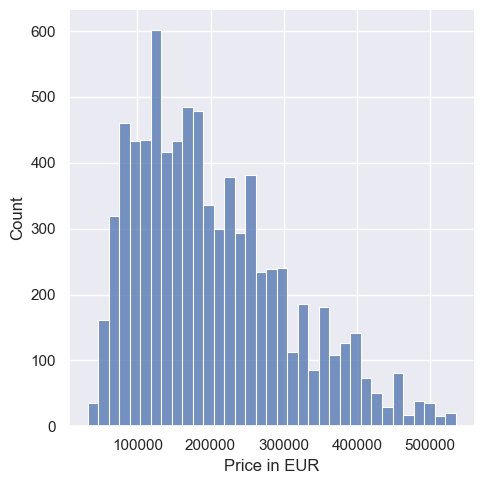

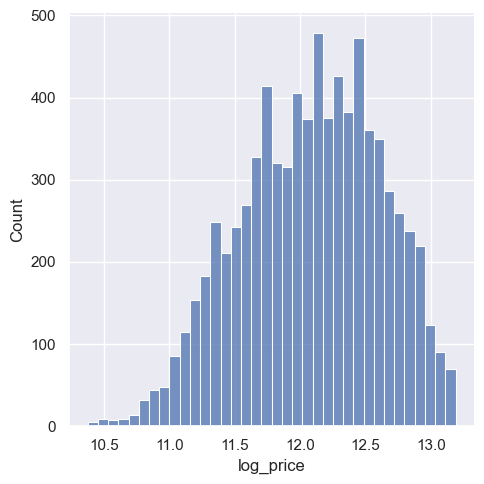

In [136]:
# Distribution of apartment prices 
sns.displot(data_cleaned['Price in EUR'])
sns.displot(data_cleaned['log_price'])

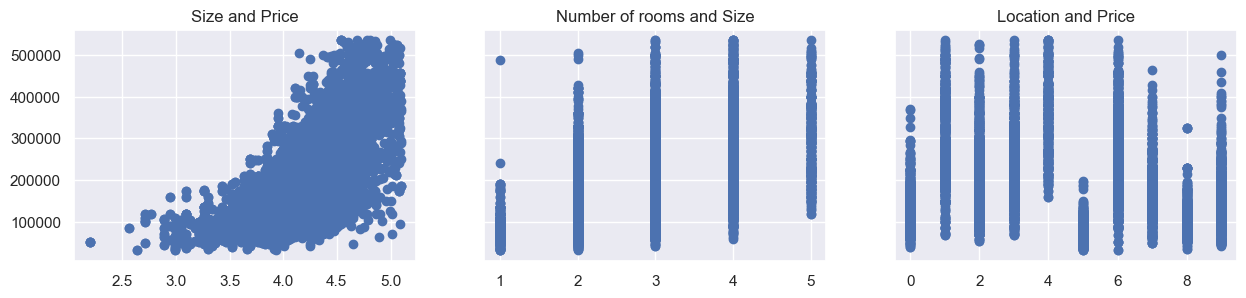

In [137]:
# Comparing variables with price
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Size'],data_cleaned['Price in EUR'])
ax1.set_title('Size and Price')
ax2.scatter(data_cleaned['Rooms'],data_cleaned['Price in EUR'])
ax2.set_title('Number of rooms and Size')
ax3.scatter(data_cleaned['Location_Cluster'],data_cleaned['Price in EUR'])
ax3.set_title('Location and Price')


plt.show()

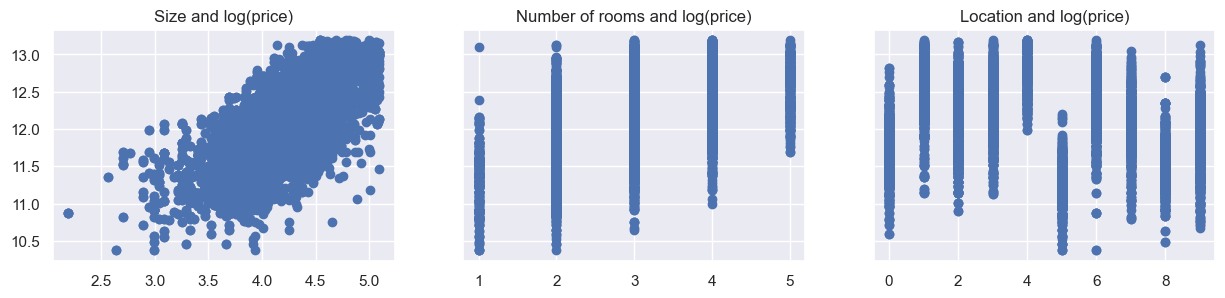

In [138]:
# Comparing variables with log(price)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Size'],data_cleaned['log_price'])
ax1.set_title('Size and log(price)')
ax2.scatter(data_cleaned['Rooms'],data_cleaned['log_price'])
ax2.set_title('Number of rooms and log(price)')
ax3.scatter(data_cleaned['Location_Cluster'],data_cleaned['log_price'])
ax3.set_title('Location and log(price)')


plt.show()

In [139]:
# Removing the original price column
data_cleaned = data_cleaned.drop(['Price in EUR'],axis=1)

In [140]:
data_cleaned.columns.values

array(['Size', 'Rooms', 'log_price', 'Location_Cluster'], dtype=object)

In [150]:
# Checking for multicollinearity (removing where VIF > 10 approximately)
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Rooms','Size', 'Location_Cluster']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [152]:
vif

VIF          Features
0 18.52             Rooms
1 22.97              Size
2  3.24  Location_Cluster

In [154]:
# Removing the column with the number of rooms as there is high multicollinearity

data_no_multicollinearity = data_cleaned.drop(['Rooms'],axis=1)

In [156]:
# Checking for multicollinearity again

variables = data_no_multicollinearity[['Size','Location_Cluster']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [158]:
vif

VIF          Features
0 3.13              Size
1 3.13  Location_Cluster

In [160]:
# Getting dummy variables based on the Location variable previously clustered
data_with_dummies = pd.get_dummies(data_no_multicollinearity, columns=['Location_Cluster'], drop_first=True)

In [162]:
data_with_dummies.head()

Size  log_price  Location_Cluster_1  Location_Cluster_2  Location_Cluster_3  Location_Cluster_4  Location_Cluster_5  Location_Cluster_6  Location_Cluster_7  Location_Cluster_8  Location_Cluster_9
0  4.25      12.25               False                True               False               False               False               False               False               False               False
1  4.09      12.13               False                True               False               False               False               False               False               False               False
2  4.13      11.92               False               False               False               False               False               False               False               False               False
3  4.04      11.74               False               False               False               False               False               False               False               False               False
4  3.99      11.84               False               False               False               False               False               False               False               False               False

In [164]:
data_with_dummies.columns.values

array(['Size', 'log_price', 'Location_Cluster_1', 'Location_Cluster_2',
       'Location_Cluster_3', 'Location_Cluster_4', 'Location_Cluster_5',
       'Location_Cluster_6', 'Location_Cluster_7', 'Location_Cluster_8',
       'Location_Cluster_9'], dtype=object)

In [166]:
data_preprocessed = data_with_dummies

In [168]:
# Separation of independent and dependent variables into targets and inputs
targets = data_preprocessed['log_price']

inputs = data_preprocessed.drop(['log_price'],axis=1)

In [170]:
from sklearn.preprocessing import StandardScaler

# Input scaling (standardization to normal distribution)
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [172]:
inputs_scaled = scaler.transform(inputs)

In [174]:
from sklearn.model_selection import train_test_split

# Separation of data into data with which we will train the model and test (20% test, 80% training)
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

In [176]:
# Linear Regression 
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [178]:
# Testing on inputs - y hat are predicted price values
y_hat = reg.predict(x_train)

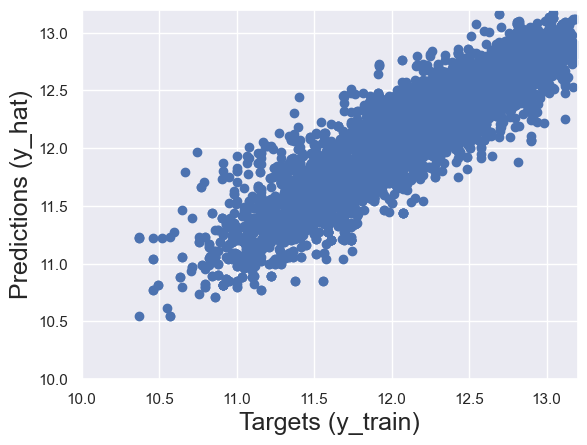

In [180]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(10,13.2)
plt.ylim(10,13.2)
plt.show()

# We compare by observing whether the dots are on the 45 degree line

Text(0.5, 1.0, 'Residuals')

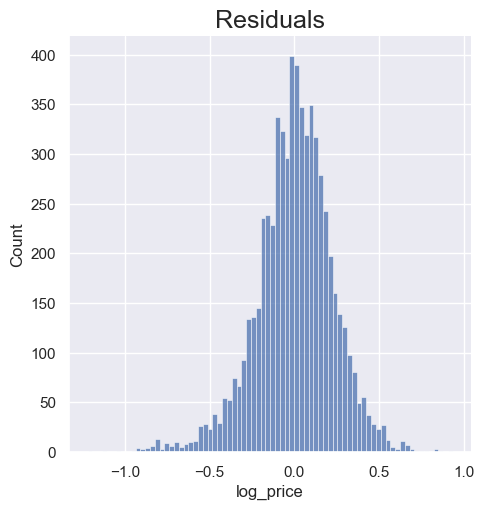

In [182]:
# Residuals graph
sns.displot(y_train - y_hat)
plt.title("Residuals", size=18)

# Ideally this graph should have a normal distribution
# Here we notice that the tail on the left side is a little bigger than it should be

In [184]:
# R squared
reg.score(x_train,y_train)

0.8193106788313879

In [186]:
#  Adjusted R squared
adj_r2 = 1 - (1-reg.score(x_train,y_train)) * (len(x_train)-1)/(len(x_train)-x_train.shape[1]-1)
print(adj_r2)

0.819026442051195


In [188]:
# The constant in our model
reg.intercept_

12.082400377241724

In [190]:
# Coefficients of explanatory variables
reg.coef_

array([ 0.30133439,  0.20858563,  0.12367228,  0.17027962,  0.18727819,
       -0.07513123,  0.20580632,  0.08281407, -0.01996347,  0.05508094])

In [192]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features  Weights
0                Size     0.30
1  Location_Cluster_1     0.21
2  Location_Cluster_2     0.12
3  Location_Cluster_3     0.17
4  Location_Cluster_4     0.19
5  Location_Cluster_5    -0.08
6  Location_Cluster_6     0.21
7  Location_Cluster_7     0.08
8  Location_Cluster_8    -0.02
9  Location_Cluster_9     0.06

In [194]:
# Regression testing on the test data we split earlier
y_hat_test = reg.predict(x_test)

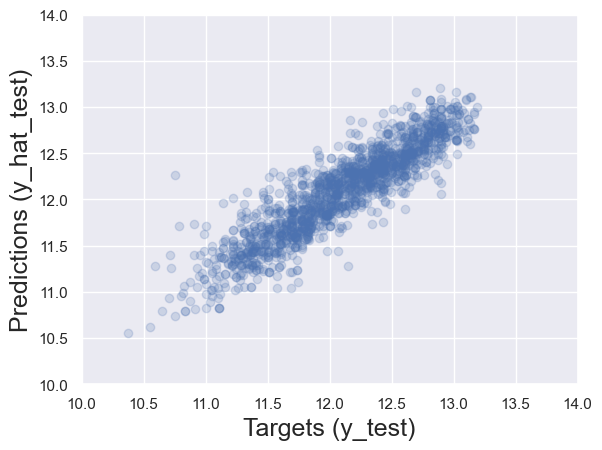

In [196]:
# Scatter plot with model predictions and real values
plt.scatter(y_test, y_hat_test, alpha=0.2) # alpha determines the transparency of the data
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(10,14)
plt.ylim(10,14)
plt.show()

In [198]:
print("Train R²:", reg.score(x_train, y_train))
print("Test R²:", reg.score(x_test, y_test))

Train R²: 0.8193106788313879
Test R²: 0.8197870749396851


In [200]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

Prediction
0    92916.74
1   173301.89
2   313104.90
3   194019.70
4    76796.72

In [202]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0   12.07
1   12.39
2   12.79
3   11.90
4   11.35
Name: log_price, dtype: float64

In [204]:
df_pf['Target'] = np.exp(y_test)
df_pf

Prediction    Target
0       92916.74 175000.00
1      173301.89 240000.00
2      313104.90 360000.00
3      194019.70 147000.00
4       76796.72  85000.00
5      116046.88 137000.00
6      321902.86 289900.00
7      182480.76 200000.00
8      263160.47 232000.00
9      149413.06  97000.00
10     207125.79 300000.00
11     212111.23 301000.00
12     264309.27 322000.00
13     183605.96 250000.00
14     292494.12 249000.00
15     378324.12 313500.00
16     279737.60 230000.00
17     284178.90 400000.00
18     195628.95 225000.00
19     226534.79 135000.00
20      72034.87  79200.00
21     143231.07 109500.00
22     213911.23 255000.00
23     171220.66 180000.00
24     370832.02 427000.00
25     185603.24 170000.00
26     302637.22 370000.00
27     256719.46 250000.00
28     100437.58  85800.00
29     272486.15 329000.00
30     116578.82 155000.00
31     127304.44 105000.00
32      89008.44  86400.00
33     343771.48 458000.00
34     126926.67  93600.00
35      85264.69  64300.00
36     140997.11 139000.00
37     161045.10 171100.00
38     119713.68  79900.00
39      77873.45  82200.00
40     164175.66  99000.00
41     248037.58 270000.00
42     290435.72 239000.00
43     163035.74 145200.00
44     132117.33 133000.00
45     318290.55 360000.00
46     110464.98 114500.00
47     102856.05 115000.00
48     175977.46  84000.00
49     242393.00 272000.00
50     185603.24 162000.00
51     142043.64 121600.00
52     237024.97 250200.00
53     104777.21 121500.00
54     224735.16 209700.00
55     216138.10 222600.00
56     122195.47  88400.00
57     414099.38 379000.00
58      92078.25  99000.00
59     142043.64 140000.00
60     189536.15 132600.00
61     252230.83 202500.00
62     195324.31 175000.00
63     213217.42 195000.00
64     195324.31 200000.00
65     175487.41 267000.00
66      71326.39  67000.00
67     107408.84 136800.00
68     318072.48 395000.00
69     296595.04 309000.00
70     173301.89 400000.00
71     217052.91 230000.00
72     151492.43 180000.00
73     237637.62 330000.00
74     207451.77 330000.00
75     169478.95 200000.00
76     273128.30 325000.00
77     140124.05 184830.00
78     267612.20 300000.00
79     227337.06 250000.00
80     309728.66 450000.00
81     122402.54 119000.00
82     175735.62 167000.00
83      78724.79 102000.00
84     109150.64 108000.00
85     235078.13 260000.00
86     195921.38 237500.00
87     106685.49 125000.00
88     195657.35 150000.00
89     198062.86 315000.00
90     108581.29 123000.00
91     100370.22  97500.00
92     193273.68 219000.00
93     342569.30 407000.00
94     141361.85 122000.00
95     344253.12 398000.00
96     241452.16 225000.00
97     201036.76 165000.00
98     144340.56 186000.00
99     191641.89 189000.00
100    247776.32 187000.00
101    257286.55 300000.00
102    273768.82 330000.00
103    162800.14 149000.00
104    124235.52 105000.00
105    126564.29 134000.00
106    173747.00 145000.00
107    173301.89 130000.00
108    191641.89 116000.00
109    129623.01 129000.00
110    115560.91 124740.00
111    140997.11 175500.00
112     93283.29  91650.00
113    432727.34 430000.00
114    285468.70 239000.00
115    205468.91 220000.00
116    198062.86 115000.00
117    209779.83 278400.00
118    101518.65 112000.00
119    407057.36 375000.00
120    264309.27 305000.00
121    254559.25 295000.00
122    216114.75 190000.00
123    198691.57 170000.00
124    137473.06 162000.00
125     86966.65  68000.00
126    108145.36 118000.00
127    397551.99 325000.00
128    283988.71 310000.00
129    216861.70 198000.00
130    139201.57 163000.00
131    162800.14 165000.00
132    117684.87 112000.00
133     90364.89  84000.00
134    370832.02 437675.00
135     69094.93  65000.00
136    159045.35 190000.00
137    189804.24 159000.00
138    192571.56 145000.00
139    154422.93 156400.00
140    201708.84 243000.00
141    465111.59 399000.00
142    161124.68 139000.00
143    255281.01 165000.00
144    152759.71 154100.00
145    205114.06 220000.00
146    428091.25 375000.00
147    310

In [205]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since we use OLS based on the algorithm that minimizes the total sum of squared errors (residuals), we compare predictions with real values

In [208]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

Prediction    Target   Residual  Difference%
0       92916.74 175000.00   82083.26        46.90
1      173301.89 240000.00   66698.11        27.79
2      313104.90 360000.00   46895.10        13.03
3      194019.70 147000.00  -47019.70        31.99
4       76796.72  85000.00    8203.28         9.65
5      116046.88 137000.00   20953.12        15.29
6      321902.86 289900.00  -32002.86        11.04
7      182480.76 200000.00   17519.24         8.76
8      263160.47 232000.00  -31160.47        13.43
9      149413.06  97000.00  -52413.06        54.03
10     207125.79 300000.00   92874.21        30.96
11     212111.23 301000.00   88888.77        29.53
12     264309.27 322000.00   57690.73        17.92
13     183605.96 250000.00   66394.04        26.56
14     292494.12 249000.00  -43494.12        17.47
15     378324.12 313500.00  -64824.12        20.68
16     279737.60 230000.00  -49737.60        21.63
17     284178.90 400000.00  115821.10        28.96
18     195628.95 225000.00   29371.05        13.05
19     226534.79 135000.00  -91534.79        67.80
20      72034.87  79200.00    7165.13         9.05
21     143231.07 109500.00  -33731.07        30.80
22     213911.23 255000.00   41088.77        16.11
23     171220.66 180000.00    8779.34         4.88
24     370832.02 427000.00   56167.98        13.15
25     185603.24 170000.00  -15603.24         9.18
26     302637.22 370000.00   67362.78        18.21
27     256719.46 250000.00   -6719.46         2.69
28     100437.58  85800.00  -14637.58        17.06
29     272486.15 329000.00   56513.85        17.18
30     116578.82 155000.00   38421.18        24.79
31     127304.44 105000.00  -22304.44        21.24
32      89008.44  86400.00   -2608.44         3.02
33     343771.48 458000.00  114228.52        24.94
34     126926.67  93600.00  -33326.67        35.61
35      85264.69  64300.00  -20964.69        32.60
36     140997.11 139000.00   -1997.11         1.44
37     161045.10 171100.00   10054.90         5.88
38     119713.68  79900.00  -39813.68        49.83
39      77873.45  82200.00    4326.55         5.26
40     164175.66  99000.00  -65175.66        65.83
41     248037.58 270000.00   21962.42         8.13
42     290435.72 239000.00  -51435.72        21.52
43     163035.74 145200.00  -17835.74        12.28
44     132117.33 133000.00     882.67         0.66
45     318290.55 360000.00   41709.45        11.59
46     110464.98 114500.00    4035.02         3.52
47     102856.05 115000.00   12143.95        10.56
48     175977.46  84000.00  -91977.46       109.50
49     242393.00 272000.00   29607.00        10.88
50     185603.24 162000.00  -23603.24        14.57
51     142043.64 121600.00  -20443.64        16.81
52     237024.97 250200.00   13175.03         5.27
53     104777.21 121500.00   16722.79        13.76
54     224735.16 209700.00  -15035.16         7.17
55     216138.10 222600.00    6461.90         2.90
56     122195.47  88400.00  -33795.47        38.23
57     414099.38 379000.00  -35099.38         9.26
58      92078.25  99000.00    6921.75         6.99
59     142043.64 140000.00   -2043.64         1.46
60     189536.15 132600.00  -56936.15        42.94
61     252230.83 202500.00  -49730.83        24.56
62     195324.31 175000.00  -20324.31        11.61
63     213217.42 195000.00  -18217.42         9.34
64     195324.31 200000.00    4675.69         2.34
65     175487.41 267000.00   91512.59        34.27
66      71326.39  67000.00   -4326.39         6.46
67     107408.84 136800.00   29391.16        21.48
68     318072.48 395000.00   76927.52        19.48
69     296595.04 309000.00   12404.96         4.01
70     173301.89 400000.00  226698.11        56.67
71     217052.91 230000.00   12947.09         5.63
72     151492.43 180000.00   28507.57        15.84
73     237637.62 330000.00   92362.38        27.99
74     207451.77 330000.00  122548.23        37.14
75     169478.95 200000.00   30521.05        15.26
76     273128.30 325000.00   51871.70        15.96
77     140124.05 184830.00  

In [209]:
df_pf.describe()

Prediction    Target   Residual  Difference%
count     1592.00   1592.00    1592.00      1592.00
mean    199789.50 206324.70    6535.19        17.99
std      92815.26 105631.19   48348.06        18.67
min      38196.27  32000.00 -195977.88         0.02
25%     123339.59 120000.00  -19379.70         7.11
50%     189804.24 185000.00    2644.89        13.89
75%     255281.01 271067.00   29726.00        23.77
max     544086.51 535000.00  226698.11       351.37

In [211]:
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Displat all columns
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', '{:.2f}'.format)  # Format to two decimal places


In [214]:
df_pf.sort_values(by=['Difference%'])

Prediction    Target   Residual  Difference%
158    112867.76 112850.00     -17.76         0.02
1523    99022.08  99000.00     -22.08         0.02
827    106028.20 106000.00     -28.20         0.03
1354   129964.85 130000.00      35.15         0.03
1287   245076.49 245000.00     -76.49         0.03
1312    76474.60  76500.00      25.40         0.03
361     79859.65  79800.00     -59.65         0.07
1074    79859.65  79800.00     -59.65         0.07
1258   148815.44 149000.00     184.56         0.12
434    194706.37 195000.00     293.63         0.15
1139   172309.58 172000.00    -309.58         0.18
625    172309.58 172000.00    -309.58         0.18
819    120217.92 120000.00    -217.92         0.18
983    197611.28 198000.00     388.72         0.20
711    239529.09 239000.00    -529.09         0.22
790    239529.09 239000.00    -529.09         0.22
736    418782.41 420000.00    1217.59         0.29
1562   361199.97 360000.00   -1199.97         0.33
412     81071.43  80800.00    -271.43         0.34
773    115466.18 115000.00    -466.18         0.41
1288   139201.57 138600.00    -601.57         0.43
235    378324.12 380000.00    1675.88         0.44
1435   144340.56 145000.00     659.44         0.45
993    190873.74 190000.00    -873.74         0.46
408    431925.11 434000.00    2074.89         0.48
109    129623.01 129000.00    -623.01         0.48
367    250218.41 249000.00   -1218.41         0.49
892    250218.41 249000.00   -1218.41         0.49
352    250218.41 249000.00   -1218.41         0.49
1402   250218.41 249000.00   -1218.41         0.49
1524   250218.41 249000.00   -1218.41         0.49
1454   250218.41 249000.00   -1218.41         0.49
1433   250218.41 249000.00   -1218.41         0.49
1085    93283.29  93750.00     466.71         0.50
191     79486.99  79900.00     413.01         0.52
1458   318290.55 320000.00    1709.45         0.53
961    318290.55 320000.00    1709.45         0.53
1469   132238.58 133000.00     761.42         0.57
846    110645.92 110000.00    -645.92         0.59
445    110645.92 110000.00    -645.92         0.59
1090   110645.92 110000.00    -645.92         0.59
190    149857.76 150800.00     942.24         0.62
1229   129182.81 130000.00     817.19         0.63
1498   432727.34 430000.00   -2727.34         0.63
113    432727.34 430000.00   -2727.34         0.63
443    106685.49 106000.00    -685.49         0.65
44     132117.33 133000.00     882.67         0.66
1055   353330.82 351000.00   -2330.82         0.66
843    353330.82 351000.00   -2330.82         0.66
927    263160.47 265000.00    1839.53         0.69
1075   200408.89 199000.00   -1408.89         0.71
1283    93283.29  94000.00     716.71         0.76
608    212098.41 213730.00    1631.59         0.76
724    248083.87 250000.00    1916.13         0.77
236    267878.11 270000.00    2121.89         0.79
628    171250.20 169888.00   -1362.20         0.80
340    240976.02 239000.00   -1976.02         0.83
686    171051.53 172480.00    1428.47         0.83
978    171051.53 172480.00    1428.47         0.83
923    110930.26 110000.00    -930.26         0.85
1541   284533.63 287000.00    2466.37         0.86
1530   237024.97 235000.00   -2024.97         0.86
1443   237024.97 235000.00   -2024.97         0.86
144    152759.71 154100.00    1340.29         0.87
1206   203211.24 205000.00    1788.76         0.87
1004   267638.28 270000.00    2361.72         0.87
730    247776.32 250000.00    2223.68         0.89
541    202766.50 200970.00   -1796.50         0.89
1317   345815.57 349000.00    3184.43         0.91
1328   202766.50 200900.00   -1866.50         0.93
1444   230326.39 232500.00    2173.61         0.93
1053   100437.58  99500.00    -937.58         0.94
1513    63395.23  64000.00     604.77         0.94
1569   323040.24 320000.00   -3040.24         0.95
695    444205.46 440000.00   -4205.46         0.96
981    402858.73 399000.00   -3858.73         0.97
426    176730.78 175000.00   -1730.78         0.99
704    128699.94 130000.00  

In [215]:
import pickle

# Save the trained model
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(reg, f)

In [218]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)